### <center><h1>Food Delivery App Data Analysis</h1></center>


   <center><h2>Project- Module 1</h2></center>
                          

### Data Pre-processing .
Data Pre-processing is one of the important steps in data analytics because data that is not processed can lead to different unwanted results when the data will be used for further applications. This task includes sub-tasks such as handling null values, deletion or transformation of irrelevant values, datatype transformation, removing duplicates, etc. 

* ##### Importing necessary library 
* ##### Load csv file to Pandas DataFrame using read_csv() function.

In [1]:
import pandas as pd
import numpy as np
import warnings           #______the warnings library is used to suppress any warnings that may appear while executing the code.
warnings.filterwarnings("ignore")
### Set display option            #_____________to display the DataFrame
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', None)

def read_data_from_csv():
    hotels=pd.read_csv("E:\Internship\HiCounselor\Food Delivery App Data Analysis Project\zomato.csv")
    return hotels

#function read_data_from_csv to read read file.

In [2]:
hotels=read_data_from_csv()
hotels.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [3]:
hotels.shape

(56252, 13)

In [4]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [5]:
hotels.isnull().sum()

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

#### Task 1: Removing Unwanted Columns from dataframe.

* Removing Unwanted Columns:

>Removing unwanted columns refers to the process of eliminating irrelevant or unnecessary columns from a dataset. This can improve data analysis and visualization by reducing clutter and focusing on the most important information. It involves identifying and selecting the columns to be removed and executing the removal process.


In [6]:
def remove_unwanted_columns():
    #call read_data_from_csv() function to get dataframe
    hotels=read_data_from_csv()
    remove_cols=['address','phone']
    hotels.drop(remove_cols, axis=1, inplace=True)
    return hotels


In [7]:
hotels=remove_unwanted_columns()
(hotels.shape)

(56252, 11)

In [8]:
hotels=remove_unwanted_columns()
(hotels.head(2))

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet


In [9]:
hotels.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

#### Task 2: Renaming and Selecting Columns in a Dataset

>Renaming columns involves changing the names of one or more columns in a dataset to make them more meaningful or consistent. Selecting columns refers to the process of choosing only specific columns to be included in a dataset, while excluding all others. These techniques are useful for improving the organization and readability of data and can help streamline data analysis. By renaming and selecting only the relevant columns, data scientists can create a more focused and manageable dataset that is better suited for their specific analysis needs.

In [10]:

def rename_columns():
    #call remove_unwanted_columns() function to get dataframe
    hotels = remove_unwanted_columns()
    #rename columns,  only following columns are allowed in the dataset
    # 1.	Id  (not needed for analysis part we will consider in SQL module 2)
    # 2.	Name
    # 3.	online_order
    # 4.	book_table
    # 5.	rating
    # 6.	votes
    # 7.	location
    # 8.	rest_type
    # 9.	dish_liked
    # 10.	cuisines
    # 11.	approx_cost
    # 12.	type
    
    #hotels['Id'] = hotels.index + 1
    hotels= hotels.rename(columns={'rate':'rating','approx_cost(for two people)':'approx_cost','listed_in(type)':'type'})
    hotels=hotels[['name','online_order', 'book_table','rating','votes','location','rest_type', 'dish_liked','cuisines','approx_cost','type']]
    return hotels
    
    return hotels


In [11]:
hotels=rename_columns()
(hotels.shape)

(56252, 11)

In [12]:
hotels=rename_columns()
(hotels.head())

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [13]:
i=hotels.iloc[0:50:2]  #Slicing first 50 rows of df hotel with step of 2 
i

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,Buffet
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NaN
10,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes
12,Cafe Shuffle,Yes,Yes,4.2/5,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,Cafes
14,Caf-Eleven,No,No,4.0/5,424,Banashankari,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,Cafes
16,Cafe Vivacity,Yes,No,3.8/5,90,Banashankari,Cafe,"Garlic Bread, Burgers, Sandwiches, Pizza, Hot ...",Cafe,650,Cafes
18,Kirthi's Biryani,Yes,No,3.8/5,144,Banashankari,Cafe,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P...","Chinese, Cafe, Italian",700,Cafes


In [14]:
hotels.isnull().sum()

name               16
online_order       19
book_table         58
rating           7838
votes              78
location          126
rest_type         338
dish_liked      28225
cuisines          203
approx_cost       521
type             4610
dtype: int64

#### Task 3: Dealing with Null Values in a Dataset
>Handling null values refers to the process of identifying and addressing missing or incomplete data in each column of a dataset. This involves using techniques like imputation, where missing values are replaced with estimated values based on other data, or deletion, where incomplete records are removed entirely. Proper handling of null values is critical for accurate data analysis and can help prevent bias and errors in results.

In [15]:
#handle  null values of each column
def null_value_check():
    #call rename_columns() function to get dataframe
    hotels=rename_columns()
    
    #deleting null values of name column
    hotels= hotels.dropna(subset=['name'])
    
    #handling null values of online_order using fillna method
    hotels['online_order'].fillna(value='NA', inplace=True)

    #handling null values of book_table
    #hotels['book_table'] = hotels['book_table'].fillna('No')
    hotels['book_table'].fillna(value='NA', inplace=True)

    #handling null values of rating
    #hotels['rating'].fillna(value=0, inplace=True)
    hotels['rating'].fillna(value=0, inplace=True)
   
    #handling null values of votes
    #hotels['votes'] = hotels['votes'].fillna(hotels['votes'].median())
    hotels['votes'].fillna(value=0, inplace=True)

    #handling null values of location
    #hotels = hotels.dropna(subset=['location'])
    hotels['location'].fillna(value='NA', inplace=True)

    #handling null values of rest_type
    #hotels['rest_type'] = hotels['rest_type'].fillna('Others')
    hotels['rest_type'].fillna(value='NA', inplace=True)


    
    #handling null values of dishliked
    #hotels.dish_liked.fillna('Not Available', inplace=True)
    hotels['dish_liked'].fillna(value='NA', inplace=True)

    
    #handling null values of cuisines
    hotels['cuisines'].fillna(value='NA', inplace=True)

    
    #handling null values of approxcost
    #hotels['approx_cost'].fillna(value=hotels['approx_cost'].mean(), inplace=True)
    hotels['approx_cost'].fillna(value=0, inplace=True)

    
    #handling null values of type
    hotels['type'].fillna(value='NA', inplace=True)   

    
    return hotels




In [16]:
hotels=null_value_check()
hotels.shape

(56236, 11)

In [17]:
hotels=null_value_check()
hotels.isnull().sum()

name            0
online_order    0
book_table      0
rating          0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
approx_cost     0
type            0
dtype: int64

#### Task4: Identifying Duplicate Data in a Dataset
>Finding duplicates in a dataset refers to the process of identifying records that are identical or nearly identical to one another. Duplicate data can skew analysis results and waste computational resources, so it is important to identify and remove duplicates before analyzing data. This can be achieved using algorithms that compare records and identify common attributes, or through manual inspection of the dataset.

In [18]:
# Find duplicates in the dataset
def find_duplicates():
    #call null_value_check() function to get dataframe
    hotels=null_value_check()
    
    #drop duplicate rows
    hotels=hotels.drop_duplicates(keep='first')
    return hotels

#To get Duplicates as well in dataset we can use- 
    #duplicates=hotels[hotels.duplicated()]
    #return hotels, duplicates


In [19]:
hotels=find_duplicates()
(hotels.duplicated().sum())

0

In [20]:
hotels=find_duplicates()
hotels.shape

(38413, 11)

In [21]:
hotels.head(15)

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NA,"North Indian, South Indian, Andhra, Chinese",800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NA
9,service was sluggish as they took too long to...,('Rated 4.0','RATED\n Amazing cafe,\nTop floor,no outdoor seating.\nFood is delicious,a nice place to give a try.'),('Rated 1.0','RATED\n Located opposite to wildcraft store...,we had nachos cheese salsa which was okay. We...,it turned out worse than the garlic bread. Th...,parking facility I could not locate. Staff ca...



#### Task 5 Text Cleaning
>Text cleaning refers to the process of removing irrelevant or unnecessary text from all the columns in a dataset. This is an essential step in data preprocessing and analysis, as it ensures that the data is accurate and reliable. Text cleaning can involve tasks such as removing stopwords, punctuation, and special characters, as well as correcting spelling and grammar errors.

In [22]:
hotels.name.value_counts()

 ('Rated 4.0'                                                                                                                                                                                       288
 ('Rated 5.0'                                                                                                                                                                                       221
 ('Rated 3.0'                                                                                                                                                                                       111
Cafe Coffee Day                                                                                                                                                                                      88
Empire Restaurant                                                                                                                                                                                    64


In [23]:
hotels.book_table.value_counts()

No                                                                                                                                                                                                                                                                                                                                                          29425
Yes                                                                                                                                                                                                                                                                                                                                                          4847
 ('Rated 4.0'                                                                                                                                                                                                                                                                                       

In [24]:
hotels.votes.value_counts()

0                                                                                                                                             5096
4                                                                                                                                              764
6                                                                                                                                              632
7                                                                                                                                              551
9                                                                                                                                              469
                                                                                                                                              ... 
 although staff is friendly but is completely non experienced... still i will recommend this place coz what they serve

In [25]:
hotels.location.value_counts()

BTM                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  2540
Whitefield                                                                                                                                                                                                                                                                                                                                    

In [26]:
hotels.rest_type.value_counts()

Quick Bites                                                                                                                                                                                              12213
Casual Dining                                                                                                                                                                                             7440
Cafe                                                                                                                                                                                                      2463
Delivery                                                                                                                                                                                                  1546
Dessert Parlor                                                                                                                                                              

In [27]:
hotels.dish_liked.value_counts()

NA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        17138
 ('Rated 4.0'                                                                                                                                                                                                                                                                                                                                                                                                                                                                               374
 ('Rated 5.0'                           

In [28]:
hotels.cuisines.value_counts()

North Indian                                                                                                                                                                                                                                                                                                            1911
North Indian, Chinese                                                                                                                                                                                                                                                                                                   1580
South Indian                                                                                                                                                                                                                                                                                                            1175
Bakery, Desserts                                 

In [29]:
hotels.approx_cost.value_counts()

300                                                                                                                                                                                                                                                                                   4609
400                                                                                                                                                                                                                                                                                   4471
500                                                                                                                                                                                                                                                                                   3341
200                                                                                                                                                    

In [30]:
hotels.type.value_counts()

Delivery                                                                                                                                                                                                                                                                                                                                                                                                             15106
Dine-out                                                                                                                                                                                                                                                                                                                                                                                                             11706
NA                                                                                                                                                                                

In [31]:
#removing irrelevant text from all the columns

def removing_irrelevant_text():
    #call find_duplicates() function to get dataframe
    hotels= find_duplicates()
    text = r'\b(Rated|RATED)\b'

    cols = ['name','online_order', 'book_table', 'rating', 'votes', 'location','rest_type', 'dish_liked', 'cuisines', 'approx_cost', 'type']
    for col in cols:
        hotels = hotels[~hotels[col].astype(str).str.contains(text, regex=True)]
        hotels = hotels[~(hotels == 0).any(axis=1)]
    hotels = hotels.dropna()

    return hotels

In [32]:
i=hotels.iloc[0:50:2]
i

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NA,"North Indian, South Indian, Andhra, Chinese",800,Buffet
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NA
10,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes
12,Cafe Shuffle,Yes,Yes,4.2/5,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,Cafes
14,Caf-Eleven,No,No,4.0/5,424,Banashankari,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,Cafes
16,Cafe Vivacity,Yes,No,3.8/5,90,Banashankari,Cafe,"Garlic Bread, Burgers, Sandwiches, Pizza, Hot ...",Cafe,650,Cafes
18,Kirthi's Biryani,Yes,No,3.8/5,144,Banashankari,Cafe,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P...","Chinese, Cafe, Italian",700,Cafes


#def removing_irrelevant_text():
   hotels = find_duplicates()
    
    pattern = r'\b(Rated|RATED)\b'

    cols = ['name','online_order', 'book_table', 'rating', 'votes', 'location','rest_type', 'dish_liked', 'cuisines', 'approx_cost', 'type']
    #for col in cols:
     #   hotels[col] = hotels[col].replace("[^a-zA-Z0-9-\s]", '',regex=True)
    for col in cols:
        hotels = hotels[hotels[col].str.match(r'^.*?(RATED|Rated).*$')==False]
    hotels = hotels.dropna()
     
    return hotels

   

In [33]:
hotels = removing_irrelevant_text()
hotels.shape

(30340, 11)

In [34]:
 hotels = removing_irrelevant_text()
(hotels.head(15))

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NA,"North Indian, South Indian, Andhra, Chinese",800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NA
10,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes


In [35]:
(hotels.tail(15))

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
56220,Amoeba Sports Bar,Yes,Yes,3.9 /5,578,Whitefield,"Lounge, Bar","Pasta, Fish, Beer, Chicken Wings, Mocktails, G...","Continental, Chinese","1,000",Pubs and bars
56221,One For The Road,Yes,Yes,4.1 /5,137,Whitefield,Bar,"Cocktails, Pasta, Fish","Continental, North Indian, Finger Food","1,200",Pubs and bars
56230,Kava Kitchen & Bar - Fairfield by Marriott,No,No,3.9 /5,74,Whitefield,"Casual Dining, Bar",Dal Halwa,"North Indian, South Indian, Continental, Ameri...","1,200",Pubs and bars
56237,Pablo's Gastrobar,No,No,4.0 /5,1094,Whitefield,Bar,"Cocktails, Beer, Pizza, Long Island Iced Tea, ...","Finger Food, American, Asian, Italian","1,450",Pubs and bars
56238,Oliver's Pub & Diner,Yes,Yes,3.9 /5,548,Whitefield,"Pub, Casual Dining","Pizza, Beer, Cocktails, Nachos, Pasta, Moo Bur...","Finger Food, American, Continental, Burger, Pizza","1,500",Pubs and bars
56239,Smaaash,No,Yes,4.0 /5,189,Whitefield,"Casual Dining, Pub","Pizza, Beer","North Indian, Pizza, Chinese","1,500",Pubs and bars
56240,Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200",Pubs and bars
56241,Red Glow,No,No,3.7 /5,27,Whitefield,Pub,NA,"North Indian, Continental","1,200",Pubs and bars
56242,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000",Pubs and bars
56243,Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200",Pubs and bars


In [36]:
#def removing_irrelevant_text():
#    hotels = find_duplicates()
#    hotels['Name'] = hotels['Name'].str.replace('\d+','', regex=True)
#    hotels['rating'] = hotels['rating'].str.replace('[^0-9\.]', '', regex=True)
#    hotels['votes'] = hotels['votes'].str.replace('[^0-9]', '', regex=True)
#    hotels['approx_cost'] = hotels['approx_cost'].str.replace('[^0-9]', '', regex=True)
#    return hotels

#### Task 6: Unique Value Check and Irrelevant Value Handling
>The process of examining each column in a dataset to identify and handle any irrelevant data, while also verifying the uniqueness of values within each column. This helps ensure data accuracy and integrity in analysis and decision-making.


In [37]:
rests = hotels['online_order'].unique().tolist()

# Print the list of unique locations in groups of 20 per line
for i in range(0, len(rests), 100):
    print(rests[i:i+100])

['Yes', 'No', 'tawa ke veg', ' classy. Communiti should be your go to place if you are in Bangalore. They have the best micro brewery!! The vibe is so positive and welcoming. Located in the prime location', ' Mochar Chop', ' Food: 3.5/5']


In [38]:
hotels.online_order.value_counts()

Yes                                                                                                                                                                               19519
No                                                                                                                                                                                10817
tawa ke veg                                                                                                                                                                           1
 classy. Communiti should be your go to place if you are in Bangalore. They have the best micro brewery!! The vibe is so positive and welcoming. Located in the prime location        1
 Mochar Chop                                                                                                                                                                          1
 Food: 3.5/5                                                                    

In [39]:
hotels.rating.value_counts()

3.9/5                                                                                                                    1521
3.7/5                                                                                                                    1375
3.8/5                                                                                                                    1369
3.9 /5                                                                                                                   1337
NEW                                                                                                                      1281
3.8 /5                                                                                                                   1218
3.7 /5                                                                                                                   1214
4.0/5                                                                                                                 

In [40]:
#check for unique values in each column and handle the irrelevant values
def check_for_unique_values():
    #call removing_irrelevant_text() function to get dataframe
    hotels=removing_irrelevant_text()

    hotels = hotels[hotels['online_order'].isin(['Yes', 'No'])]
    hotels['rating'] = hotels['rating'].replace(['NEW', '-'], 0)
    hotels['rating'] = hotels['rating'].str.replace('/5', '')
    hotels['rating'] = hotels['rating'].fillna(0)

    return hotels

In [41]:
 hotels = check_for_unique_values()
(hotels.head(25))

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NA,"North Indian, South Indian, Andhra, Chinese",800,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NA
10,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes


In [42]:
names = hotels['rating'].unique().tolist()
# Print the list of unique locations in groups 
for i in range(0, len(names), 200):
    print((names[i:i+200]))

['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1', '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 ']


In [43]:
online_order = hotels['online_order'].unique().tolist()
online_order

['Yes', 'No']

#### Task7: Cleaning and Exporting Zomato Dataset

>The process of cleaning the Zomato dataset by removing any unknown or unidentifiable characters and exporting the cleaned dataset to a new file named "zomatocleaned.csv". This involves identifying and removing any symbols, special characters, or non-standard characters that may interfere with proper data analysis. By exporting the cleaned dataset to a new file, the original dataset can be preserved and the cleaned data can be easily accessed for further analysis and decision-making.

In [44]:
def remove_the_unknown_character():
    #call check_for_unique_values() function to get dataframe
    dataframe=check_for_unique_values()
    #dataframe = dataframe[~dataframe['name'].str.contains('Ã')]
    #dataframe = dataframe[~dataframe['name'].str.contains('24x7')]
    dataframe['name']=dataframe['name'].str.replace('[Ãx][^A-Za-z]+','',regex=True)
    #remove unknown character f,om dataset
    return dataframe

In [45]:
dataframe=remove_the_unknown_character()
dataframe.shape

(30336, 11)

In [46]:
dataframe=remove_the_unknown_character()
dataframe.head(25)

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NA,"North Indian, South Indian, Andhra, Chinese",800,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NA
10,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Cafes


In [47]:
dataframe.online_order.value_counts()

Yes    19519
No     10817
Name: online_order, dtype: int64

In [48]:
dataframe.book_table.value_counts()

No     25505
Yes     4831
Name: book_table, dtype: int64

In [49]:
dataframe.type.value_counts()

Delivery              13153
Dine-out              10188
NA                     2584
Desserts               1953
Cafes                   964
Drinks & nightlife      572
Buffet                  513
Pubs and bars           409
Name: type, dtype: int64

In [50]:
dataframe.location.value_counts()

BTM                              2270
Indiranagar                      1577
Whitefield                       1571
HSR                              1561
Koramangala 5th Block            1461
Marathahalli                     1394
JP Nagar                         1221
Jayanagar                        1162
Bellandur                         988
Electronic City                   933
Bannerghatta Road                 908
Sarjapur Road                     803
Brigade Road                      624
Koramangala 7th Block             597
Koramangala 6th Block             582
Brookefield                       535
Kalyan Nagar                      526
Koramangala 4th Block             513
Ulsoor                            507
Banashankari                      506
Malleshwaram                      505
MG Road                           503
Koramangala 1st Block             477
New BEL Road                      456
Basavanagudi                      434
Frazer Town                       400
Residency Ro

In [51]:
#export cleaned Dataset to newcsv file named "zomatocleaned.csv"
#dataframe.to_csv('zomatocleaned.csv')
dataframe.to_csv("E:\Internship\HiCounselor\Food Delivery App Data Analysis Project\zomatocleaned.csv")


#### Task 8: Data Cleaning and Analysis with Excel and MySQL
>The process of performing data cleaning and analysis using both Excel and MySQL. 
>* The first step involves deduplication of identical rows in an exported dataset using Excel. This helps ensure data accuracy and consistency. 
>*The second step involves uploading the cleaned dataset to a provided database and performing further analysis using MySQL. This allows for powerful data querying and visualization, enabling data-driven decision-making.

In [52]:
#Here is the shape of DataFrame after perfoming this task 8.
df=pd.read_csv("E:\Internship\HiCounselor\Food Delivery App Data Analysis Project\zomatocleaned_.v.csv")
df.shape

(9880, 12)

###### NEXT TASKS - MODULE 2

### Data Visualization
*Not a part of these project

#### Importing required library 

In [53]:
import matplotlib.pyplot as plt

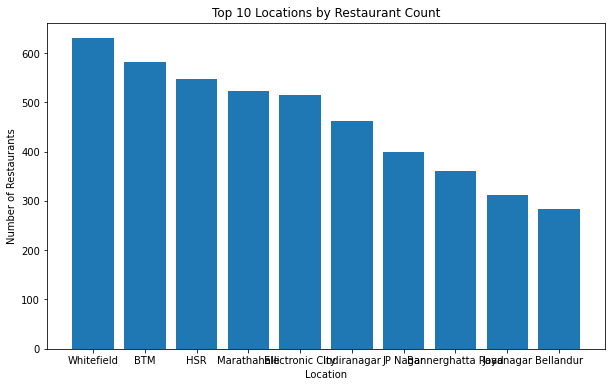

In [54]:
#Bar Plot for top 10 locations have highest number of restuarants which insights popular area for dining out.

restaurant_counts = df.groupby("location")["name"].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6)) # set the figure size to 10 inches by 6 inches
plt.bar(restaurant_counts.index, restaurant_counts.values)

plt.title("Top 10 Locations by Restaurant Count")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")

# Show the plot
plt.show()


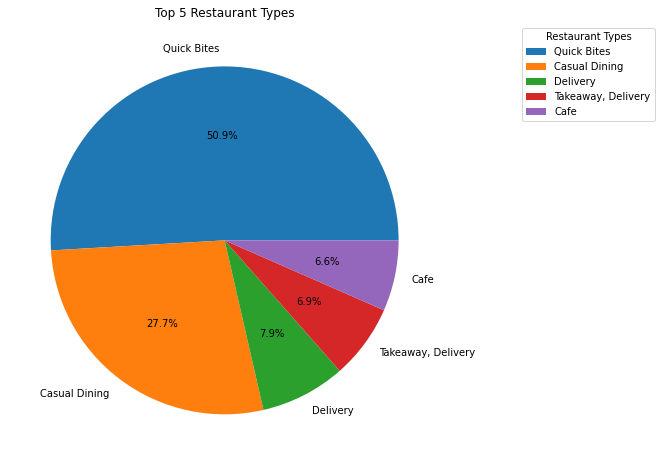

In [55]:
# Create the pie chart most common restaurants types in dataset.
restaurant_types = df["rest_type"].value_counts()[:5]

fig, ax = plt.subplots(figsize=(8, 8))

plt.pie(restaurant_types.values, labels=restaurant_types.index, autopct='%1.1f%%')
# Add a legend
ax.legend(title="Restaurant Types", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))


# Customize the plot
plt.title("Top 5 Restaurant Types")

# Show the plot
plt.show()


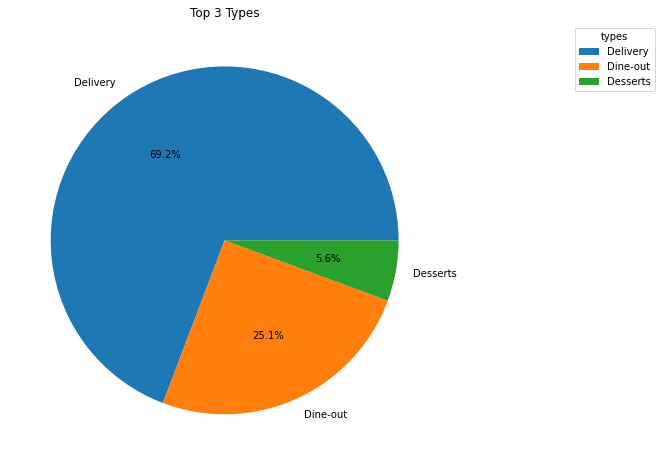

In [56]:
#Pie Chart which insights percentage distribution of top 3 types of restaurant in dataset. 

restaurant_types = df["type"].value_counts()[:3]

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

plt.pie(restaurant_types.values, labels=restaurant_types.index, autopct='%1.1f%%')

# Customize the plot
plt.title("Top 3 Types")
# Add a legend
ax.legend(title="types", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
 

# Show the plot
plt.show()


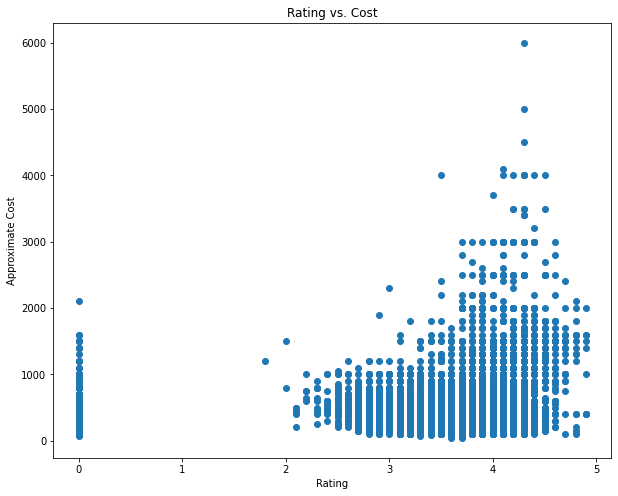

In [57]:
plt.figure(figsize=(10, 8)) # specify the size of the plot
plt.scatter(df["rating"], df["approx_cost"])

# Customize the plot
plt.title("Rating vs. Cost")
plt.xlabel("Rating")
plt.ylabel("Approximate Cost")

# Show the plot
plt.show()

In [58]:
correlation_matrix = df[["rating", "votes", "approx_cost"]].corr()

print(correlation_matrix)

               rating     votes  approx_cost
rating       1.000000  0.248803     0.229356
votes        0.248803  1.000000     0.344158
approx_cost  0.229356  0.344158     1.000000


##### Insights from correlation matrix
>* The correlation between rating and votes is 0.248803, indicating a weak positive correlation. This suggests that restaurants with higher ratings tend to have more votes.
>* The correlation between rating and approximate cost is 0.229356, indicating a weak positive correlation. This suggests that restaurants with higher ratings tend to have higher approximate costs.
>* The correlation between votes and approximate cost is 0.344158, indicating a moderate positive correlation. This suggests that restaurants with more votes tend to have higher approximate costs.